# <center>PDL Lab16: Transfer Learning Using Pre-trained Models in CNN</center>

### 205229103

### Arzoo Sah

## Import Libraries 

In [1]:
import keras 
from keras.applications.vgg16 import VGG16,preprocess_input,decode_predictions
from keras.applications.resnet import ResNet50
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense,Activation, Flatten 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Part 1

In [3]:
INPUT_SHAPE = (224,224,3)

# get the VGG16 model
model_vgg = VGG16(weights='imagenet',input_shape=INPUT_SHAPE)

model_vgg.summary()

553476096/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [4]:
paths = glob.glob('/content/drive/MyDrive/PDL_16 image_data/*')
for i in paths:
    img = Image.open(i)
    re_img = img.resize((224,224))
    re_img.save(i)

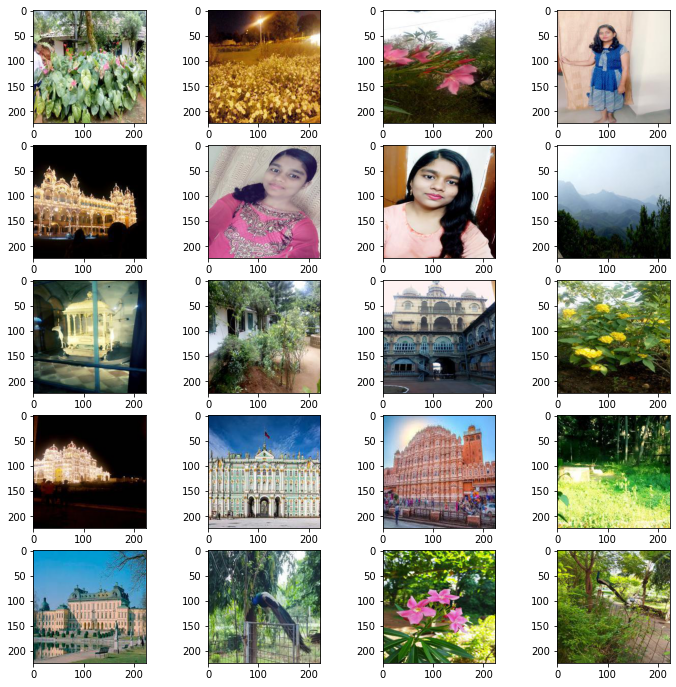

In [5]:
plt.figure(figsize=(12,12))
for i in range(len(paths)):
    plt.subplot(5,4,i+1)
    img = Image.open(paths[i])
    plt.imshow(img)

In [6]:
my_data=[]
for i in paths:
    image = load_img(i, target_size=(224, 224))
    image = img_to_array(image)                                             # convert the image pixels to a numpy array
    image = image.reshape((1,image.shape[0], image.shape[1], image.shape[2])) 
  #print(image.shape)        # reshape data for the model
    my_data.append(preprocess_input(image))             # prepare the image for the VGG model0

In [7]:
for j in my_data:
    pred_vgg = model_vgg.predict(j)
    label_vgg = decode_predictions(pred_vgg)
    print(label_vgg)
    print('\n')

49152/35363 [=========================================] - 0s 0us/step
[[('n03457902', 'greenhouse', 0.24256866), ('n03991062', 'pot', 0.18431683), ('n04417672', 'thatch', 0.059861317), ('n12768682', 'buckeye', 0.045817602), ('n07714571', 'head_cabbage', 0.03594931)]]


[[('n12144580', 'corn', 0.055172343), ('n07802026', 'hay', 0.030007528), ('n09256479', 'coral_reef', 0.028321864), ('n02793495', 'barn', 0.027067201), ('n11879895', 'rapeseed', 0.026889699)]]


[[('n03457902', 'greenhouse', 0.33060983), ('n03733131', 'maypole', 0.08289282), ('n03930313', 'picket_fence', 0.04758952), ('n11939491', 'daisy', 0.04598826), ('n03944341', 'pinwheel', 0.04087506)]]


[[('n03770439', 'miniskirt', 0.16208753), ('n03788365', 'mosquito_net', 0.087056085), ('n03594734', 'jean', 0.07586862), ('n02808304', 'bath_towel', 0.059096545), ('n04493381', 'tub', 0.054613605)]]


[[('n03877845', 'palace', 0.99699295), ('n02966193', 'carousel', 0.0016734244), ('n02980441', 'castle', 0.00036135508), ('n03781244',

In [8]:
target=[]
for j in my_data:
    pred_vgg = model_vgg.predict(j)
    label_vgg = decode_predictions(pred_vgg)
    temp=[]
  
    for i in range(5):
        temp.append(label_vgg[0][i][2])
  
    for i in range(5):
        if label_vgg[0][i][2] == max(temp):
            target.append(label_vgg[0][i][0])
            print(label_vgg[0][i][0],label_vgg[0][i][1])
target_vgg = np.array(target)

n03457902 greenhouse
n12144580 corn
n03457902 greenhouse
n03770439 miniskirt
n03877845 palace
n03980874 poncho
n03770439 miniskirt
n09472597 volcano
n04239074 sliding_door
n03899768 patio
n03877845 palace
n11939491 daisy
n03788195 mosque
n03877845 palace
n03877845 palace
n01698640 American_alligator
n03877845 palace
n01818515 macaw
n03930313 picket_fence
n03457902 greenhouse


## Part 2

In [9]:
# load model
model_resnet = ResNet50(weights='imagenet')

# summarize the model
model_resnet.summary()

102981632/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________

In [10]:
labels = []
for j in my_data:
    pred_resnet = model_resnet.predict(j)
    label_resnet = decode_predictions(pred_resnet)
  
    print(label_resnet)
    print('\n')

[[('n03991062', 'pot', 0.36331365), ('n03457902', 'greenhouse', 0.18622282), ('n04417672', 'thatch', 0.100641295), ('n07714571', 'head_cabbage', 0.031190617), ('n04604644', 'worm_fence', 0.028886275)]]


[[('n11879895', 'rapeseed', 0.21291244), ('n02793495', 'barn', 0.08653224), ('n04286575', 'spotlight', 0.055538245), ('n02782093', 'balloon', 0.05343985), ('n09332890', 'lakeside', 0.047990605)]]


[[('n03991062', 'pot', 0.10161149), ('n11939491', 'daisy', 0.09615081), ('n09332890', 'lakeside', 0.08172195), ('n03930313', 'picket_fence', 0.07277129), ('n03457902', 'greenhouse', 0.06754943)]]


[[('n04325704', 'stole', 0.2750602), ('n03866082', 'overskirt', 0.13573527), ('n04209239', 'shower_curtain', 0.07300467), ('n02808304', 'bath_towel', 0.07198713), ('n02730930', 'apron', 0.04082261)]]


[[('n03877845', 'palace', 0.9809347), ('n02966193', 'carousel', 0.011909005), ('n03781244', 'monastery', 0.0033058668), ('n03220513', 'dome', 0.001015523), ('n03388043', 'fountain', 0.0009149976)]]


In [11]:
target=[]
for j in my_data:
    pred_resnet = model_resnet.predict(j)
    label_resnet = decode_predictions(pred_resnet)
    temp=[]
  
    for i in range(5):
        temp.append(label_resnet[0][i][2])
  
    for i in range(5):
        if label_resnet[0][i][2] == max(temp):
            target.append(label_resnet[0][i][0])
            print(label_resnet[0][i][0],label_resnet[0][i][1])
target_resnet = np.array(target)

n03991062 pot
n11879895 rapeseed
n03991062 pot
n04325704 stole
n03877845 palace
n03534580 hoopskirt
n03450230 gown
n09193705 alp
n04005630 prison
n03899768 patio
n03877845 palace
n11939491 daisy
n02966193 carousel
n03877845 palace
n03877845 palace
n02727426 apiary
n03877845 palace
n01818515 macaw
n03991062 pot
n09468604 valley


## Part 4

In [12]:
num_classes=3
label = np.array([[0],[0],[1],[2],[0],[0],[0],[2],[1],[1],[2],[0],[0],[1],[1],[1],[1],[0],[0],[0]]).astype('uint8')
label = to_categorical(label,num_classes)

In [13]:
my_data = np.array(my_data)
my_data = my_data.reshape((20,224,224,3))

Xtrain, Xtest, ytrain, ytest = train_test_split(my_data,label, shuffle=True,test_size=0.35, random_state=28)
Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size=0.3,shuffle=True, random_state=28)

print(f'Train dataset: {Xtrain.shape[0]}')
print(f'Validation dataset: {Xval.shape[0]}')
print(f'Test dataset: {Xtest.shape[0]}')

Train dataset: 13
Validation dataset: 4
Test dataset: 3


In [14]:
image_size = 224
batch_size = 4

train_datagen = ImageDataGenerator(
        rescale=1./255,           # rescale pixel values [0,255] to [0,1]
        horizontal_flip=True,     # random horizontal flip
        width_shift_range=0.2,    # random shift images horizontally (fraction of total width)
        height_shift_range=0.2,   # random shift images vertically (fraction of total height)
        zoom_range=0.2)           # random zoom image
        #rotation_range=20,       # random rotation
        #shear_range=0.2)         # shear transfo
        #validation_split=0.2)    # splitting train / test datasets

test_datagen = ImageDataGenerator(rescale=1./255)
        #validation_split=0.2)

train_gen = train_datagen.flow(
        Xtrain,ytrain, 
        batch_size=batch_size,
        shuffle=False)              # already applied

valid_gen = test_datagen.flow(
        Xval, yval,
        batch_size=batch_size,
       shuffle=False)   

In [15]:
model = keras.Sequential()

# Add the vgg convolutional base model
model.add(model_vgg)

# add flatten layer
model.add(Flatten())

# add dense layers with some dropout
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# add output layer
model.add(Dense(3, activation='softmax'))


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1000)              138357544 
_________________________________________________________________
flatten (Flatten)            (None, 1000)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               256256    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 138,647,083
Trainable params: 138,647,083
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer=Adam(learning_rate=2e-5),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
steps_per_epoch = len(train_gen.x) // train_gen.batch_size
validation_steps = len(valid_gen.x) // valid_gen.batch_size

history = model.fit(train_gen,epochs=10,verbose=2,steps_per_epoch=len(Xtrain)// batch_size,validation_data=valid_gen,validation_steps=len(Xval)// batch_size)

Epoch 1/10
3/3 - 23s - loss: 1.0735 - accuracy: 0.5556 - val_loss: 1.0897 - val_accuracy: 0.5000
Epoch 2/10
3/3 - 24s - loss: 1.0730 - accuracy: 0.5556 - val_loss: 1.0893 - val_accuracy: 0.5000
Epoch 3/10
3/3 - 31s - loss: 1.0722 - accuracy: 0.5000 - val_loss: 1.0890 - val_accuracy: 0.5000
Epoch 4/10
3/3 - 23s - loss: 1.0648 - accuracy: 0.5556 - val_loss: 1.0893 - val_accuracy: 0.5000
Epoch 5/10
3/3 - 23s - loss: 1.0716 - accuracy: 0.5556 - val_loss: 1.0880 - val_accuracy: 0.5000
Epoch 6/10
3/3 - 24s - loss: 1.0689 - accuracy: 0.5556 - val_loss: 1.0876 - val_accuracy: 0.5000
Epoch 7/10
3/3 - 31s - loss: 1.0679 - accuracy: 0.5000 - val_loss: 1.0871 - val_accuracy: 0.5000
Epoch 8/10
3/3 - 31s - loss: 1.0655 - accuracy: 0.5000 - val_loss: 1.0868 - val_accuracy: 0.5000
Epoch 9/10
3/3 - 30s - loss: 1.0644 - accuracy: 0.5000 - val_loss: 1.0864 - val_accuracy: 0.5000
Epoch 10/10
3/3 - 30s - loss: 1.0633 - accuracy: 0.5000 - val_loss: 1.0860 - val_accuracy: 0.5000


In [21]:
datagen = ImageDataGenerator(
        rescale=1./255)

eval_datagen = datagen.flow(
        Xtest, ytest,
        batch_size=batch_size,
        shuffle=False)      # since shuffle was already during splitting into train, valid, test

# Evaluation on the test dataset
score = model.evaluate(eval_datagen, verbose=0)
print('Test loss: ',score[0])
print('Test accuracy: ',score[1])

Test loss:  1.0628339052200317
Test accuracy:  0.3333333432674408
